In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [43]:
# Load the customer churn dataset into a pandas DataFrame
df = pd.read_csv('S:\Telcocustomer.csv')

In [44]:
print(df.head())  # Displays the first 5 rows of the dataset

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [45]:
print("Dataset shape:", df.shape)

Dataset shape: (7043, 21)


In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Missing values

In [47]:
# Data Inspection & Missing Values Handling
print("Missing values per column:\n", df.isnull().sum())
# Notice that 'TotalCharges' might have missing values, convert it to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# After conversion, let's fill the missing 'TotalCharges' with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
print("Missing values after filling 'TotalCharges':\n", df.isnull().sum())

Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Missing values after filling 'TotalCharges':
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn      

C:\Users\91630\AppData\Local\Temp\ipykernel_17908\3610678900.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


All data types

In [48]:
# Data Types Overview & Conversion
print("\nData Types:\n", df.dtypes)

# Separate categorical and numerical columns for future steps
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Output the categorical columns
print("\nCategorical Columns:\n", categorical_cols)


Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Categorical Columns:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [49]:
# Encode Categorical Features
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding for categorical variables with multiple categories (e.g., InternetService, Contract)
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'])

# Display the dataset after encoding
print("\nDataset after encoding:\n", df.head())


Dataset after encoding:
    customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   

   StreamingMovies_No  StreamingMovies_No internet service  \
0                True                                False   
1 

In [51]:
# Display the dataset after encoding
print("\nDataset after encoding:\n", df.head())


Dataset after encoding:
    customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   

   StreamingMovies_No  StreamingMovies_No internet service  \
0                True                                False   
1 

outliers map

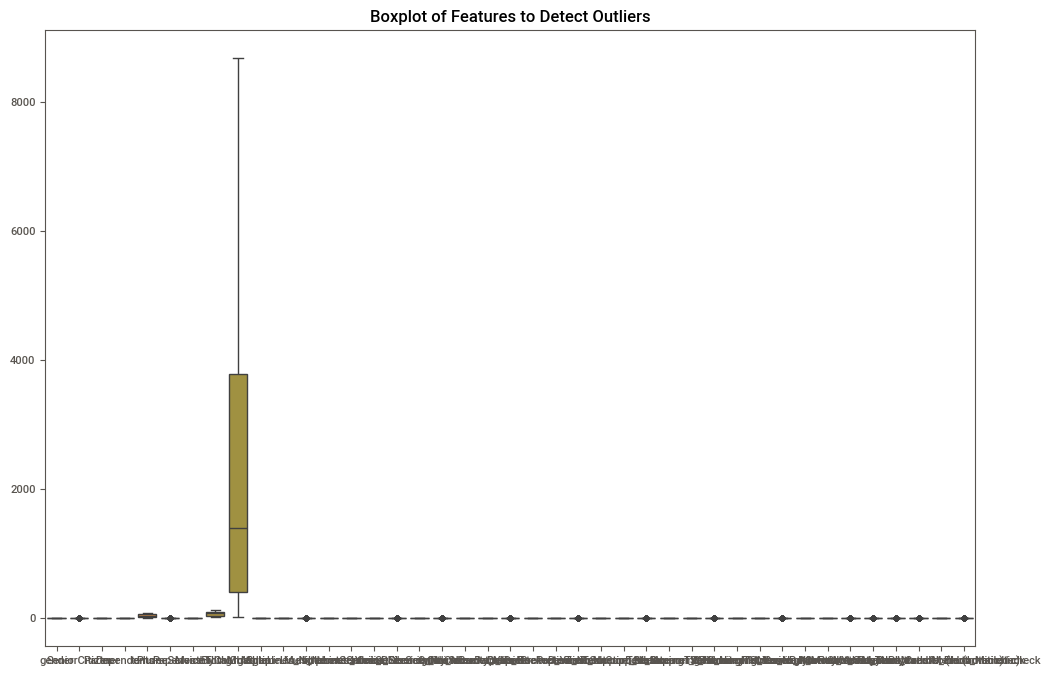


Data types:
 customerID                                  object
gender                                       int32
SeniorCitizen                                int64
Partner                                      int32
Dependents                                   int32
tenure                                       int64
PhoneService                                 int32
PaperlessBilling                             int32
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No                             bool
OnlineSecurity_No internet service            bool
OnlineSecurity_Ye

In [52]:
# Outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title("Boxplot of Features to Detect Outliers")
plt.show()
#
print("\nData types:\n", df.dtypes)
df_cleaned = df.drop(['customerID'], axis=1)

correlation heat map

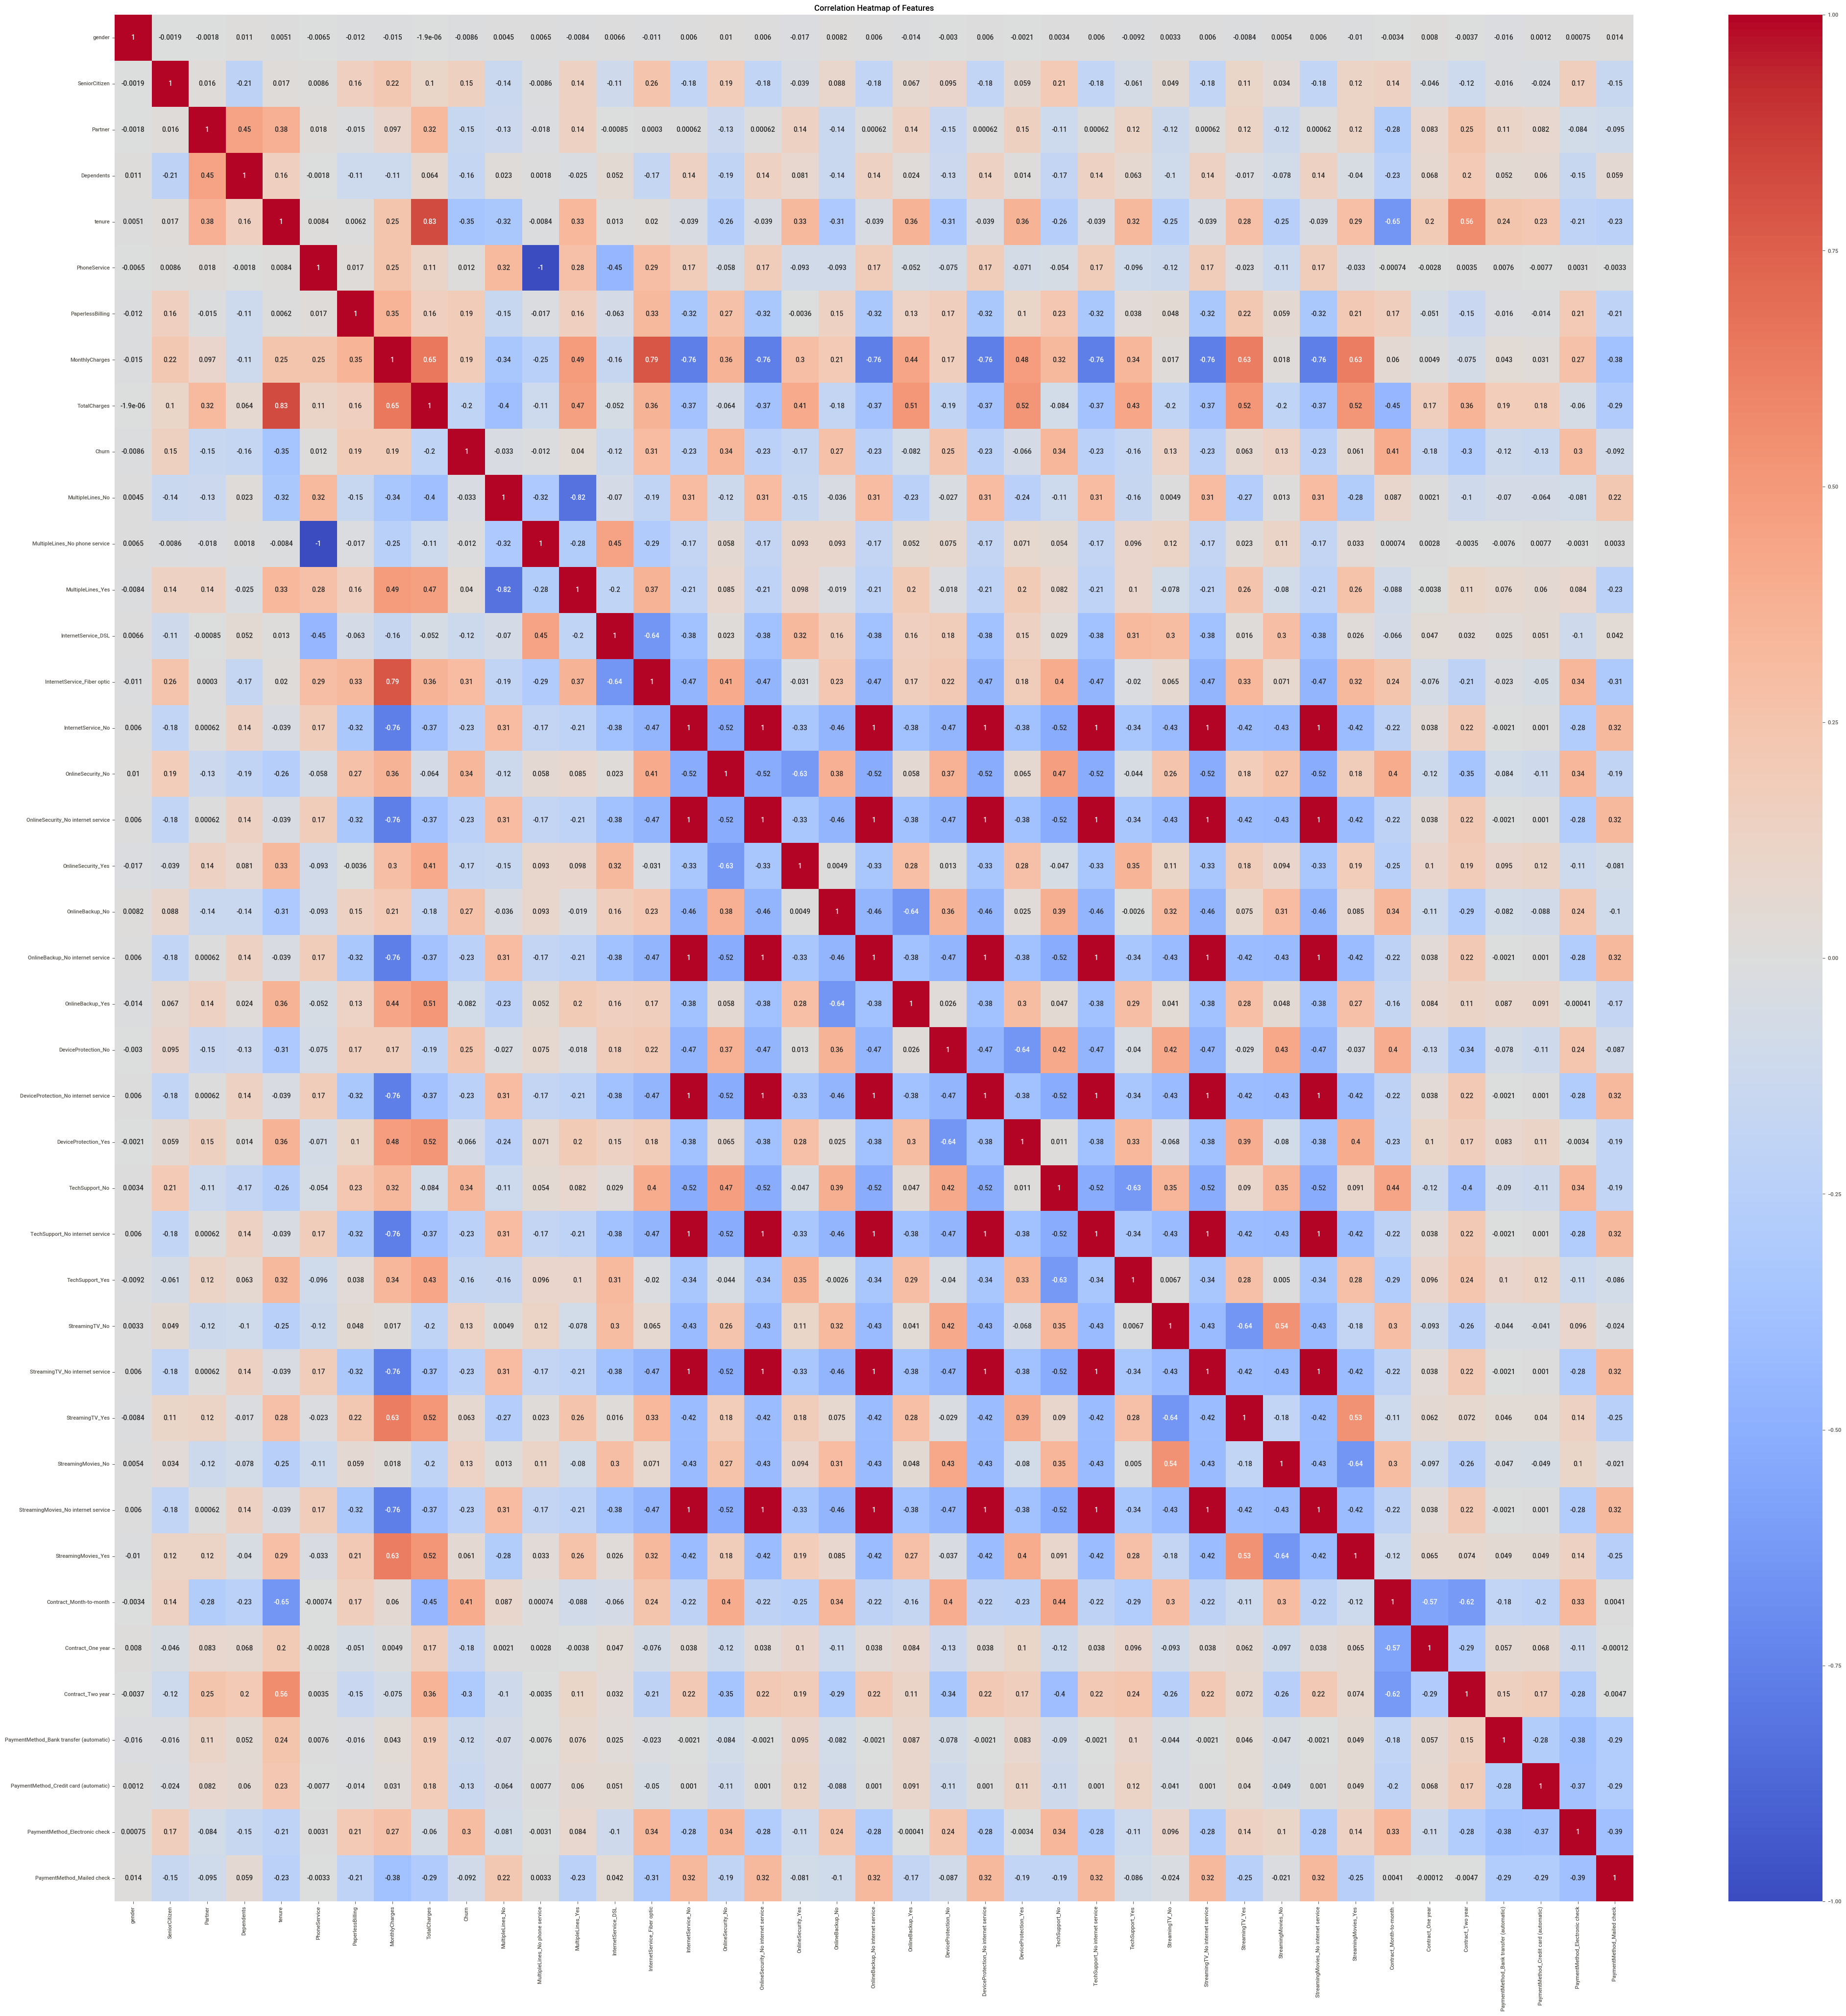

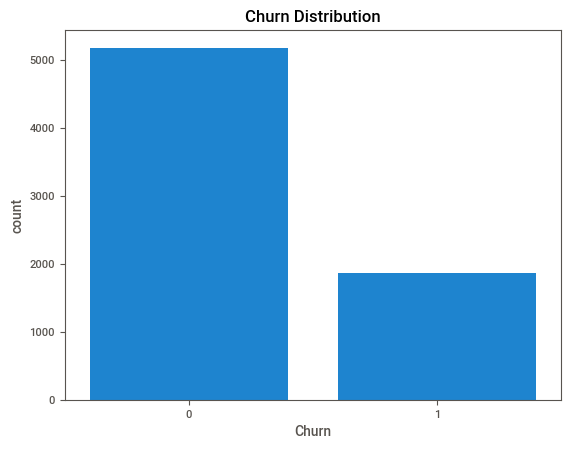

In [53]:
# Heatmap
plt.figure(figsize=(50, 50))
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of Features')
plt.show()

# Distribution of the target variable 'Churn' to check for imbalance
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [54]:
# Automated EDA Using SweetViz
# Generate an EDA report using SweetViz
sweet_report = sweetviz.analyze(df, target_feat='Churn')
sweet_report.show_html('sweetviz_churn_report.html')


[Summarizing dataframe]                      |          | [  0%]   00:00 -> (? left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)   


Report sweetviz_churn_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Feature Importance map

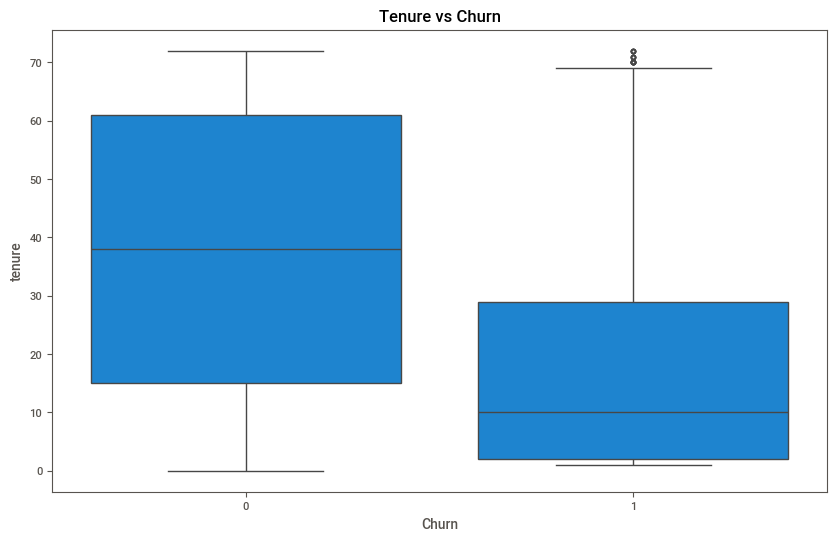

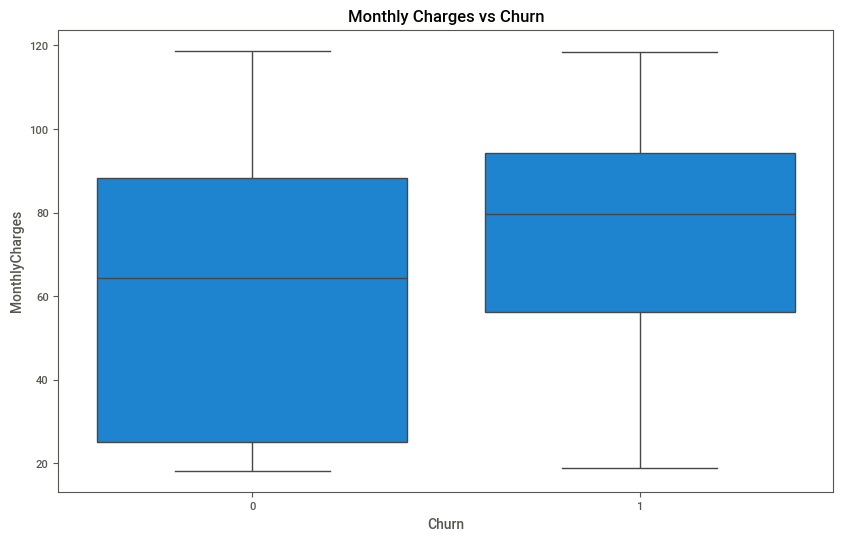

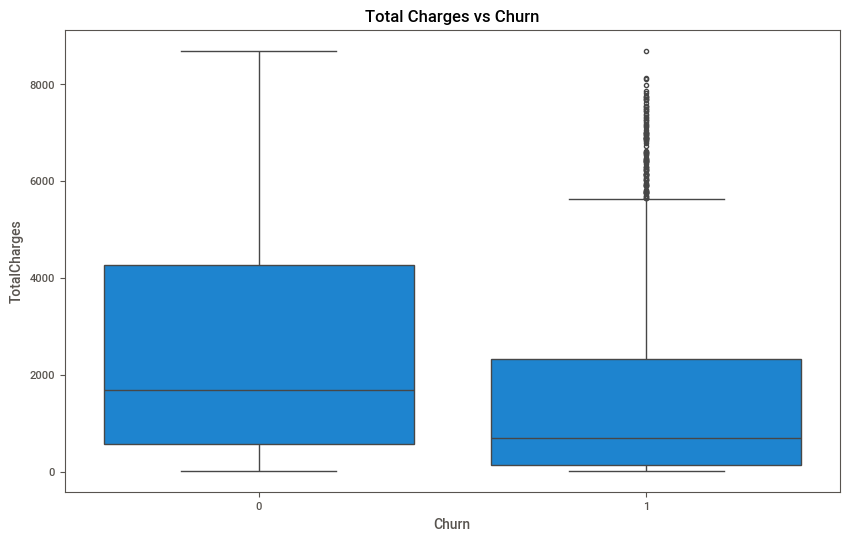

In [55]:
# Feature Importance Visualization
# Visualize some key features like tenure, MonthlyCharges, and TotalCharges in relation to churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges vs Churn')
plt.show()

In [56]:
# Splitting the Data into Training and Test Sets
# Define the features (X) and the target (y)
X = df.drop(['customerID', 'Churn'], axis=1)  # Drop customerID and Churn (target)
y = df['Churn']  # Churn is the target variable

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the training and test sets
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (5634, 40)
Test set size: (1409, 40)


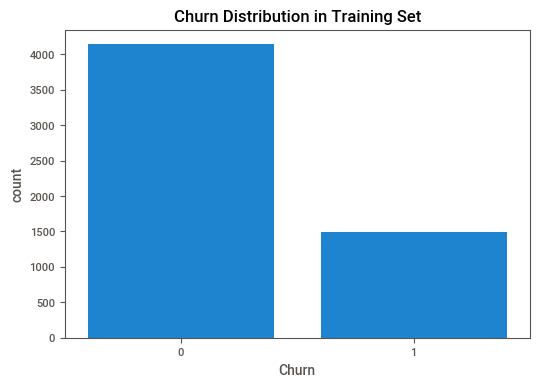

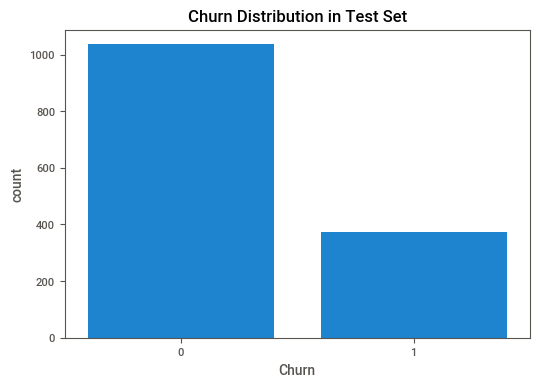

In [57]:
# Comparing 'Churn' distribution in the training and test sets
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title("Churn Distribution in Training Set")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=y_test)
plt.title("Churn Distribution in Test Set")
plt.show()

In [58]:
# Conclusion - Insights and Limitations
# After completing EDA, summarize key insights and potential issues:
# - Churn is affected by tenure, MonthlyCharges, and TotalCharges.
# - There are no significant data quality issues after handling missing values.
# - Imbalance between churned and non-churned customers is observed, which might affect model training.
# - The dataset has been properly preprocessed and is ready for machine learning models.